# Statistics for Data Science with Python #
## Final Assignment ##
### Ioannis Stathakis ###

Import libraries and load the dataset:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

Exploring the dataset:

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Part 1 - Generate Descriptive Statistics and Visualizations #
## *Question 1: For the 'Median value of owner-occupied homes' provide a boxplot* ##

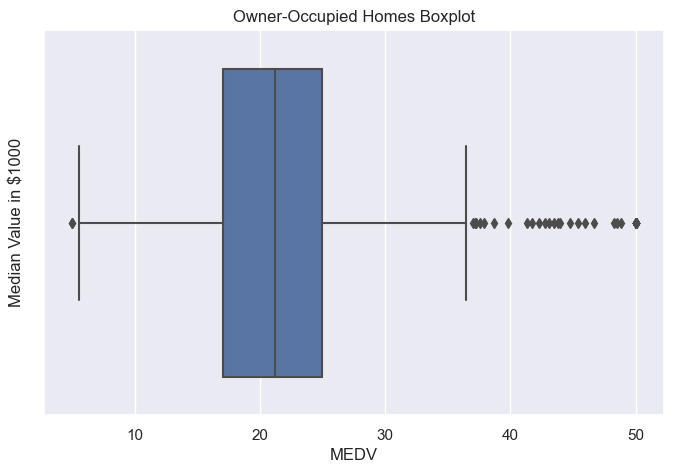

In [5]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,5))
sns.boxplot(data=boston_df, x="MEDV")
plt.title("Owner-Occupied Homes Boxplot")
plt.ylabel("Median Value in $1000")
plt.show()

We can observe the median of the values at about 21 and the 25% and 75% percentiles at about 17 and 25 respectively (in $1000).
Also notable is the single outlier below the lower bound, in contrast with the many outliers that can be observed above the upper bound.

## *Question 2: Provide a bar plot for the Charles River variable* ##

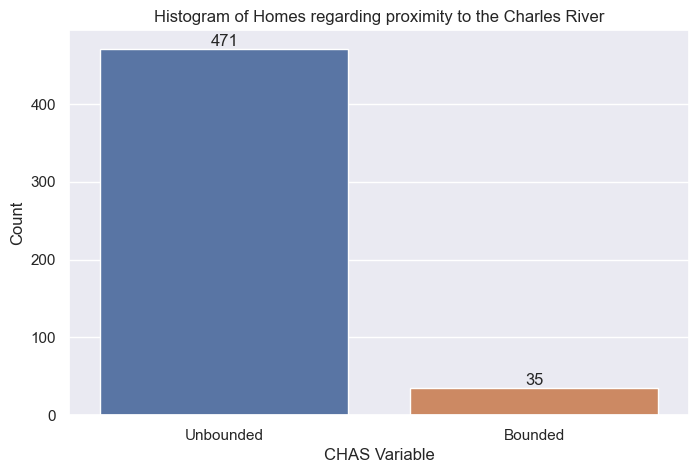

In [6]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=boston_df, x="CHAS")
plt.title("Histogram of Homes regarding proximity to the Charles River")
plt.xlabel("CHAS Variable")
plt.ylabel("Count")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Unbounded", "Bounded"])
ax.bar_label(ax.containers[0])
plt.show()

We can observe from the plot that the vast majority of houses are not bounded to the Charles River.

## *Question 3: Provide a boxplot for the MEDV variable vs the AGE variable* ##
## *(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years, and 70 years and older)* ##

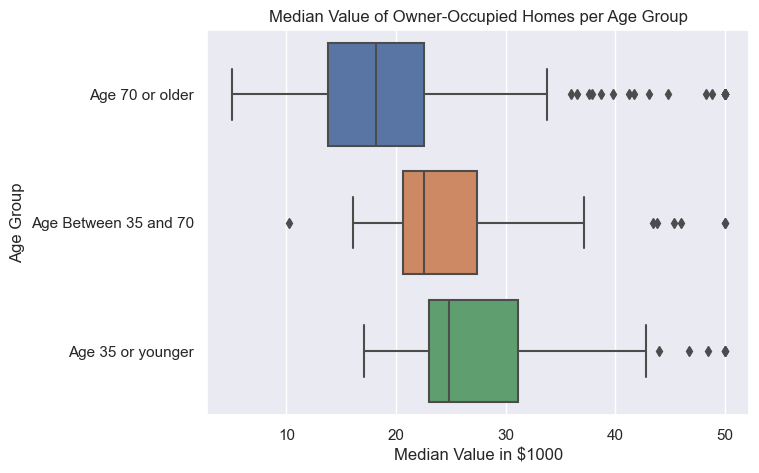

In [7]:
boston_df.loc[boston_df["AGE"]<35, "Age_Group"] = "Age 35 or younger"
boston_df.loc[(boston_df["AGE"]>35) & (boston_df["AGE"]<70), "Age_Group"] = "Age Between 35 and 70"
boston_df.loc[boston_df["AGE"]>70, "Age_Group"] = "Age 70 or older"

plt.figure(figsize=(7,5))
sns.boxplot(data=boston_df, y="Age_Group", x="MEDV",
            order=["Age 70 or older", "Age Between 35 and 70", "Age 35 or younger"])
plt.title("Median Value of Owner-Occupied Homes per Age Group")
plt.ylabel("Age Group")
plt.xlabel("Median Value in $1000")
plt.show()

The plot shows us that the median value of owner occupied homes seems to be higher at lower ages.
The are also more median outliers to be found in the older-age groups.

## *Question 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.* ## 
## *What can you say about the relationship?* ##

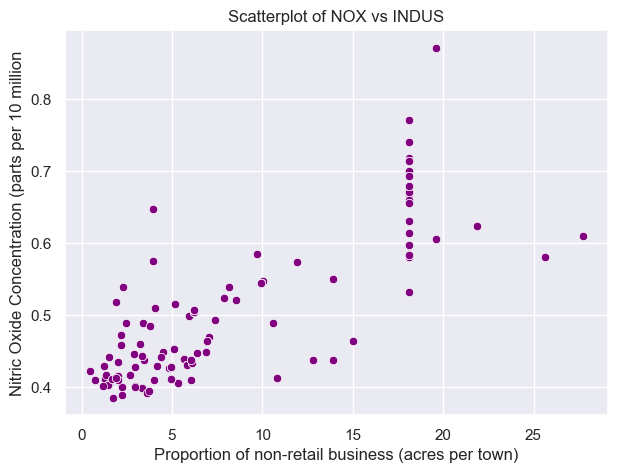

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=boston_df, x="INDUS", y="NOX", color="purple")
plt.title("Scatterplot of NOX vs INDUS")
plt.xlabel("Proportion of non-retail business (acres per town)")
plt.ylabel("Nitric Oxide Concentration (parts per 10 million")
plt.show()

There seems to be a sizeable correlation of non-retail business proportion and Nitric Oxide concentration, stabilizing at around 0.6 NOX and above. 

## *Question 5: Create a histogram for the pupil to teacher ratio variable* ##

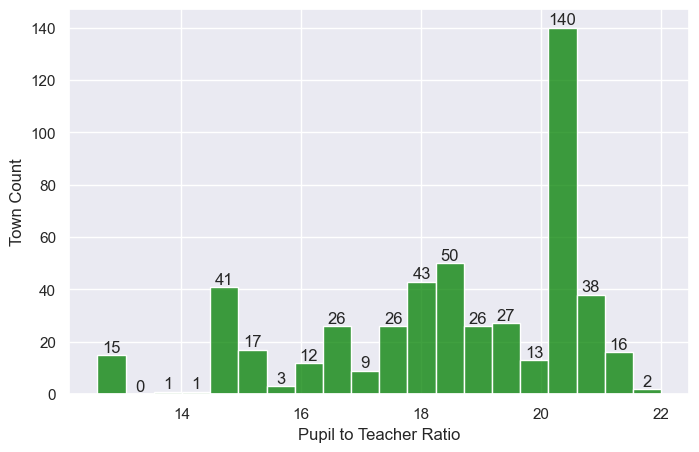

In [9]:
plt.figure(figsize=(8,5))
ax = sns.histplot(data=boston_df, x="PTRATIO", bins=20, color="green")
ax.bar_label(ax.containers[0])
plt.ylabel("Town Count")
plt.xlabel("Pupil to Teacher Ratio")
plt.show()

The vast majority of towns seem to have a pupil-to-teacher ratio of slightly above 20%.

# Part 2 - Use the appropriate statistical tests to answer the questions provided #

## *Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?* ##
## *(T-test for independent samples)* ##

Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles River or not.

Alternative Hypothesis: There is such a statistically significant difference.

We will start with the Levene's Test for Equal Variances.
Afterwards, we will use the T-Test for independent samples, and adjust the equal_var parameter accordingly.

We will use significance level alpha (a) equal to 0.05 for all the tests.

In [10]:
#Discretizing the "CHAS" variable into two groups
boston_df.loc[boston_df["CHAS"]==0, "CHAS_GROUPED"] = "Unbound"
boston_df.loc[boston_df["CHAS"]==1, "CHAS_GROUPED"] = "Bound"

#Levene's Test for Equal Variances between the groups
stats.levene(boston_df[boston_df["CHAS_GROUPED"]=="Unbound"]["MEDV"],
             boston_df[boston_df["CHAS_GROUPED"]=="Bound"]["MEDV"])

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

The Levene's Test returned p-value equal to 0.032, less than our significance level of 0.05.
We can reject the null and accept that the groups have unequal variances.
Proceeding to to T-Test, we will set the equal_var parameter to "False".

In [11]:
# T-Test for independent samples of unequal variances
stats.ttest_ind(boston_df[boston_df["CHAS_GROUPED"]=="Unbound"]["MEDV"],
                boston_df[boston_df["CHAS_GROUPED"]=="Bound"]["MEDV"],
                equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:**

The p-value returned by the T-Test is considerably lower than our significance level.

We can reject the Null Hypothesis and conclude that indeed there seems to be a significant difference in median value of houses bounded by the Charles river or not.

## *Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?* ##
## *(ANOVA)* ##

Null Hypothesis: There is no significant difference in median value of houses (MEDV) for each proportion of units built prior to 1940 (AGE).

Alternative Hypothesis: At least one of the means is significantly different.

We will use significance level alpha (a) equal to 0.05.

In [12]:
# Utilizing the grouping we did earlier on the AGE column
boston_df.loc[boston_df["AGE"]<35, "Age_Group"] = "Age 35 or younger"
boston_df.loc[(boston_df["AGE"]>35) & (boston_df["AGE"]<70), "Age_Group"] = "Age Between 35 and 70"
boston_df.loc[boston_df["AGE"]>70, "Age_Group"] = "Age 70 or older"

# Separating the samples
_35_or_younger = boston_df[boston_df['Age_Group'] == 'Age 35 or younger']['MEDV']
_35_to_70 = boston_df[boston_df['Age_Group'] == 'Age Between 35 and 70']['MEDV']
_70_or_older = boston_df[boston_df['Age_Group'] == 'Age 70 or older']['MEDV']

# Run the One-Way ANOVA
f_statistic, p_value = stats.f_oneway(_35_or_younger, _35_to_70, _70_or_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:**

Since the p-value is less than our significance level (a=0.05), we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

## *Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?* ##
## *(Pearson Correlation)* ##

Null Hypothesis: There is no significant relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.

Alternative Hypothesis: There is such a statistically significant relationship.

We will use significance level alpha (a) equal to 0.05.

In [13]:
# Run the Pearson Correlation Test
pearson_r, p_value = stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print("The Pearson Coefficient is", pearson_r, " and the p-value is", p_value)

The Pearson Coefficient is 0.7636514469209157  and the p-value is 7.91336106123623e-98


**Conclusion:**

The p-value returned by the Pearson Correlation Test is considerably lower than our significance level alpha.

We can therefore reject the Null Hypothesis and conclude that there seems to be a significant relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.

The Pearson Coefficient equal to 0.76 points to a strong positive correlation of these two variables.

## *Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?* ##
## *(Regression analysis)* ##

Null Hypothesis: There is no significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

Alternative Hypothesis: There is such a statistically significant impact/correlation.

We will use significance level alpha (a) equal to 0.05.

Regression Analysis is deployed in place of Pearson Correlation, since we are interested on the impact of one variable (DIS) on another (MEDV).

In [14]:
# Setting predictor and target, X and Y respectively
X = boston_df["DIS"]
Y = boston_df["MEDV"]

# Adding an intercept constant to the model
X = sm.add_constant(X)

# Fitting the model and aquiring predictions
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        01:02:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**

The returned R-squared is 0.062, which means that the Pearson Correlation would be roughly 0.24, indicating a medium positive correlation of these two variables.

The relevant p-value, Prob(F-statistic), is 1.21e-08, well bellow our significance level alpha (a=0.05).

We can therefore reject the Null Hypothesis and conclude that there seems to be an impact of an additional weighted distance to the five Boston employment centres (DIS), on the median value of owner occupied homes (MEDV).

The DIS Coefficient valued roughly at 1.09 indicates that additional weighted distance to the five Boston employment centres creates an increase of roughly 1.0916 to the median value of owner occupied homes.

# AUTHOR: #  
### Ioannis Stathakis ###